In [1]:
# Add src directory to Python path
import sys
import os
HOME = "/home/giovanny/Seacast"
sys.path.append(f'{HOME}/src/seacast_tools')
from np_loaders import TargetsFromNumpy, PredictionsFromNumpy
from weatherbenchX.metrics import deterministic
from weatherbenchX.metrics import base as metrics_base
from weatherbenchX import aggregation
import matplotlib.pyplot as plt

In [2]:
metrics = {
  'rmse': deterministic.RMSE(),
  'mae': deterministic.MAE(),
}
metrics['rmse'].statistics

{'SquaredError': <weatherbenchX.metrics.deterministic.SquaredError at 0x77abad3f6c20>}

In [3]:
variables = ["sst_temperature"]
directory = f"{HOME}/data/atlantic/samples/test"
extra_variables = ["coordinates", "mask"]

extra_files = [
    f"{HOME}/data/atlantic/static/coordinates.npy", 
    f"{HOME}/data/atlantic/static/sea_mask.npy"
    ]

targets = TargetsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
    )

In [4]:
targets_dataset = targets.load_chunk()

targets_dataset

<xarray.Dataset> Size: 7GB
Dimensions:          (latitude: 300, longitude: 300, init_time: 1080,
                      lead_time: 15)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 9kB 2019-03-20 ... 2019-11-11
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 1GB Tru...
    valid_time       (init_time, lead_time) datetime64[ns] 130kB 2019-03-21 ....
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 6GB ...

In [5]:
directory = f"{HOME}/output/crossing_edges_5_3/predictions"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset = pred_loader.load_chunk()

predictions_dataset

<xarray.Dataset> Size: 7GB
Dimensions:          (latitude: 300, longitude: 300, init_time: 1080,
                      lead_time: 15)
Coordinates:
  * latitude         (latitude) float64 2kB 19.57 19.62 19.68 ... 34.48 34.52
  * longitude        (longitude) float64 2kB -20.93 -20.88 ... -6.025 -5.975
  * init_time        (init_time) datetime64[ns] 9kB 2019-03-20 ... 2019-11-11
  * lead_time        (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days
    mask             (init_time, lead_time, latitude, longitude) bool 1GB Tru...
Data variables:
    sst_temperature  (init_time, lead_time, latitude, longitude) float32 6GB ...

In [6]:
statistics = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset, targets_dataset
)

In [7]:
aggregator = aggregation.Aggregator(
  reduce_dims=["init_time"], skipna=True
)

aggregation_state = aggregator.aggregate_statistics(statistics)

aggregation_state

AggregationState(sum_weighted_statistics={'SquaredError': {'sst_temperature': <xarray.DataArray 'sst_temperature' (lead_time: 15, latitude: 300,
                                     longitude: 300)> Size: 5MB
array([[[ 12.084755 ,  11.856527 ,  12.316744 , ...,   0.       ,
           0.       ,   0.       ],
        [ 12.805453 ,  12.117657 ,  12.281787 , ...,   0.       ,
           0.       ,   0.       ],
        [ 14.399303 ,  13.48792  ,  13.129162 , ...,   0.       ,
           0.       ,   0.       ],
        ...,
        [  3.2327487,   2.9870021,   2.7623837, ...,   0.       ,
           0.       ,   0.       ],
        [  3.0675178,   2.7716162,   2.6285818, ...,   0.       ,
           0.       ,   0.       ],
        [  2.9539292,   2.7306097,   2.7463188, ...,   0.       ,
           0.       ,   0.       ]],

       [[ 37.995174 ,  37.37046  ,  38.89004  , ...,   0.       ,
           0.       ,   0.       ],
        [ 39.349792 ,  38.03962  ,  39.063137 , ...,   0.     

In [8]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature']

<xarray.DataArray 'sst_temperature' (lead_time: 15, latitude: 300,
                                     longitude: 300)> Size: 5MB
array([[[0.01118959, 0.01097827, 0.01140439, ...,        nan,
                nan,        nan],
        [0.0118569 , 0.01122005, 0.01137203, ...,        nan,
                nan,        nan],
        [0.01333269, 0.01248882, 0.01215663, ...,        nan,
                nan,        nan],
        ...,
        [0.00299329, 0.00276574, 0.00255776, ...,        nan,
                nan,        nan],
        [0.00284029, 0.00256631, 0.00243387, ...,        nan,
                nan,        nan],
        [0.00273512, 0.00252834, 0.00254289, ...,        nan,
                nan,        nan]],

       [[0.03518072, 0.03460228, 0.0360093 , ...,        nan,
                nan,        nan],
        [0.03643499, 0.03522187, 0.03616957, ...,        nan,
                nan,        nan],
        [0.04004984, 0.03879253, 0.03834305, ...,        nan,
                nan,        nan],
...
        [0.21562766, 0.21338457, 0.2125583 , ...,        nan,
                nan,        nan],
        [0.21690968, 0.21235777, 0.21131225, ...,        nan,
                nan,        nan],
        [0.21080787, 0.2071877 , 0.20857117, ...,        nan,
                nan,        nan]],

       [[0.61173457, 0.621536  , 0.63870937, ...,        nan,
                nan,        nan],
        [0.6115674 , 0.62679595, 0.63966733, ...,        nan,
                nan,        nan],
        [0.6230616 , 0.6400318 , 0.6511238 , ...,        nan,
                nan,        nan],
        ...,
        [0.23283002, 0.23008545, 0.22954488, ...,        nan,
                nan,        nan],
        [0.23383625, 0.22889973, 0.22784352, ...,        nan,
                nan,        nan],
        [0.22785068, 0.22412808, 0.22567181, ...,        nan,
                nan,        nan]]], shape=(15, 300, 300), dtype=float32)
Coordinates:
  * latitude   (latitude) float64 2kB 19.57 19.62 19.68 ... 34.42 34.48 34.52
  * longitude  (longitude) float64 2kB -20.93 -20.88 -20.82 ... -6.025 -5.975
  * lead_time  (lead_time) timedelta64[ns] 120B 1 days 2 days ... 15 days

In [9]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].lead_time.data.astype('timedelta64[D]')

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype='timedelta64[D]')

Text(0.5, 1.02, 'crossing_edges_5_3')

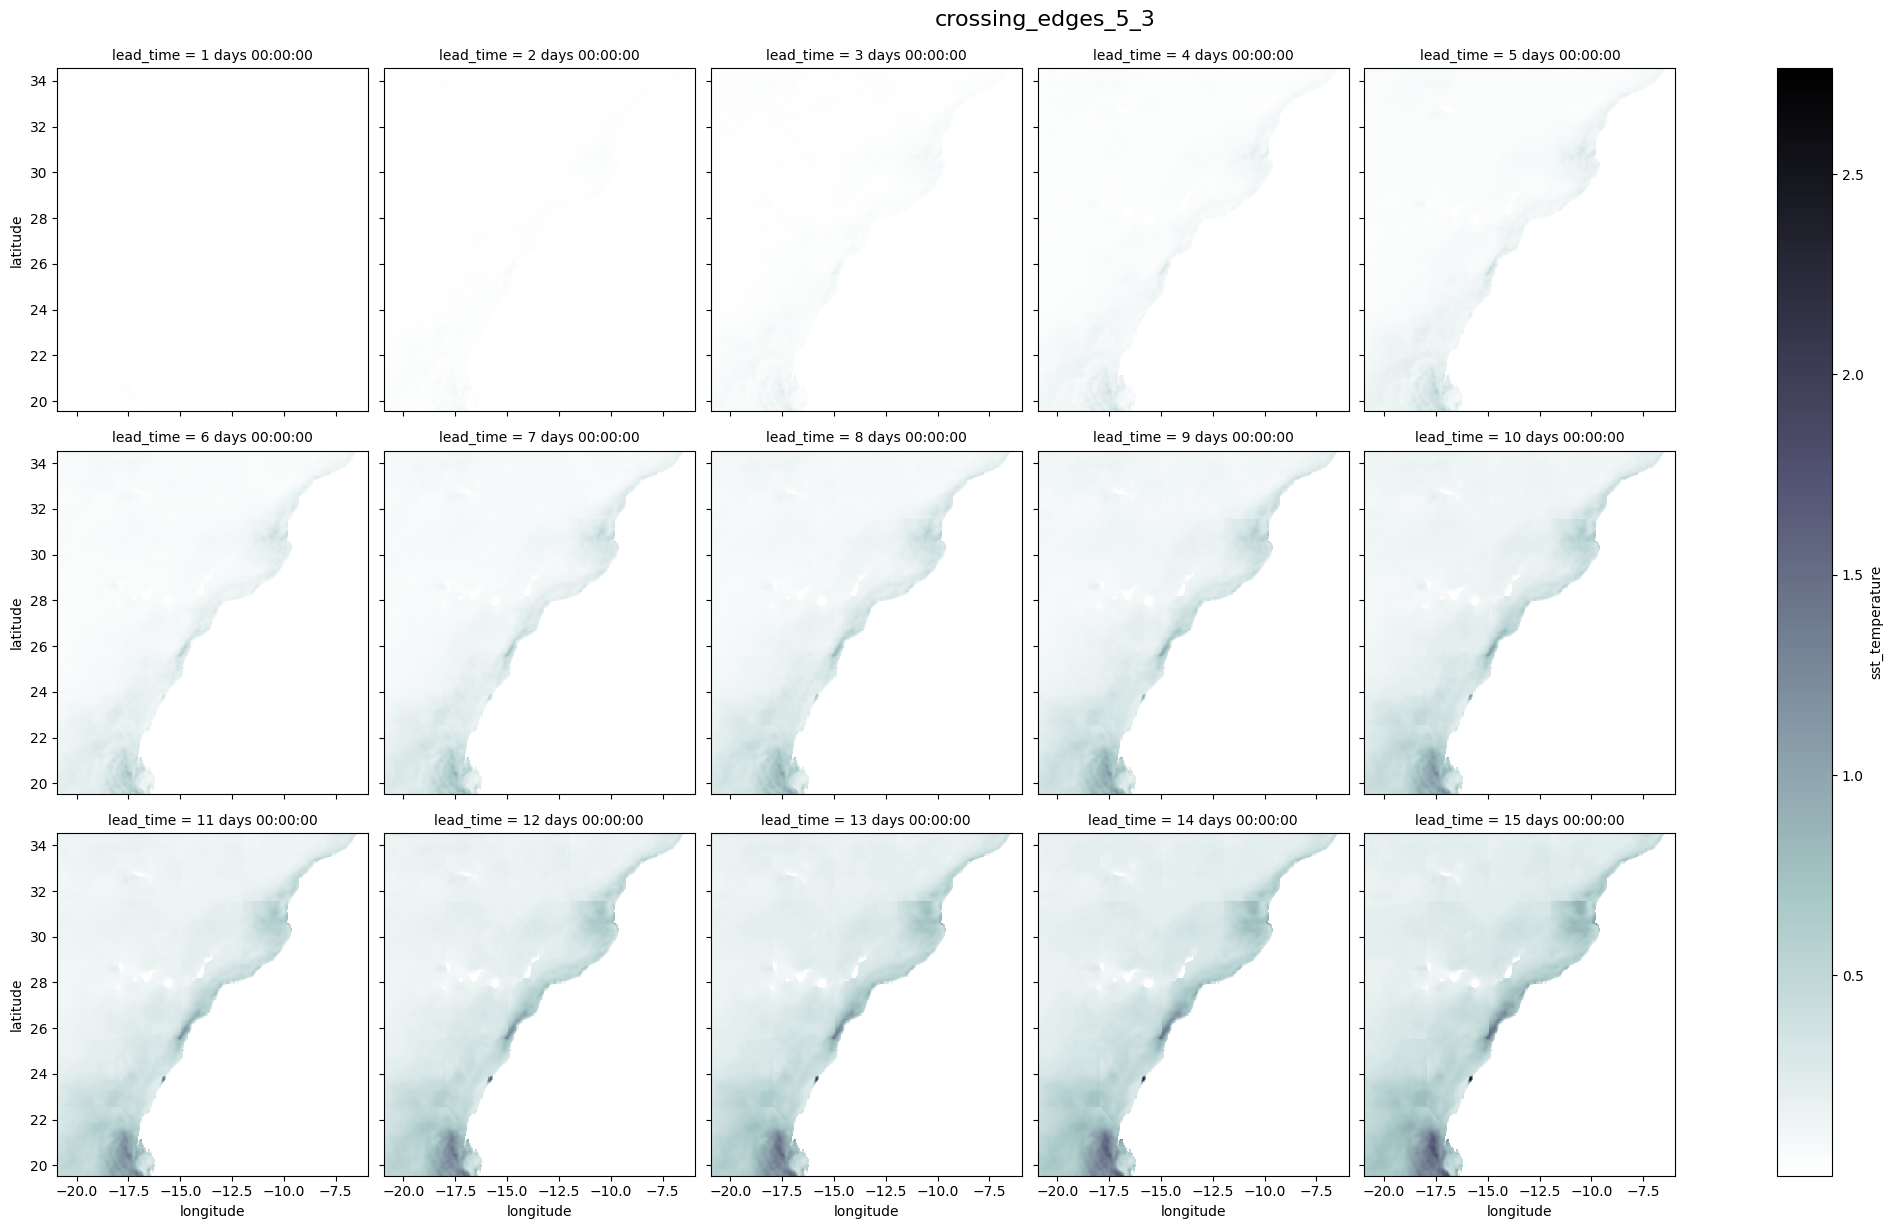

In [10]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].plot(
    x="longitude", 
    y="latitude", 
    col="lead_time", 
    cmap='bone_r',
    col_wrap=5,
    aspect=1, 
    size=4,
    )
plt.suptitle("crossing_edges_5_3", fontsize=16, y=1.02)

In [11]:
x1 = aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].lead_time.data.astype('timedelta64[D]')
y1 = aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].mean(dim=['latitude', 'longitude'], skipna=True).data

In [12]:
variables = ["sst_temperature"]
directory = f"{HOME}/data/atlantic/samples/test"
extra_variables = ["coordinates", "mask"]

extra_files = [
    f"{HOME}/data/atlantic/static/coordinates.npy", 
    f"{HOME}/data/atlantic/static/sea_mask.npy"
    ]

targets = TargetsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
    )
    
targets_dataset = targets.load_chunk()

directory = f"{HOME}/output/non_crossing_edges_5_3/predictions"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset = pred_loader.load_chunk()

statistics = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset, targets_dataset
)

aggregator = aggregation.Aggregator(
  reduce_dims=["init_time"], skipna=True
)

aggregation_state = aggregator.aggregate_statistics(statistics)

x2 = aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].lead_time.data.astype('timedelta64[D]')
y2 = aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].mean(dim=['latitude', 'longitude'], skipna=True).data

Text(0.5, 1.02, 'non_crossing_edges_5_3')

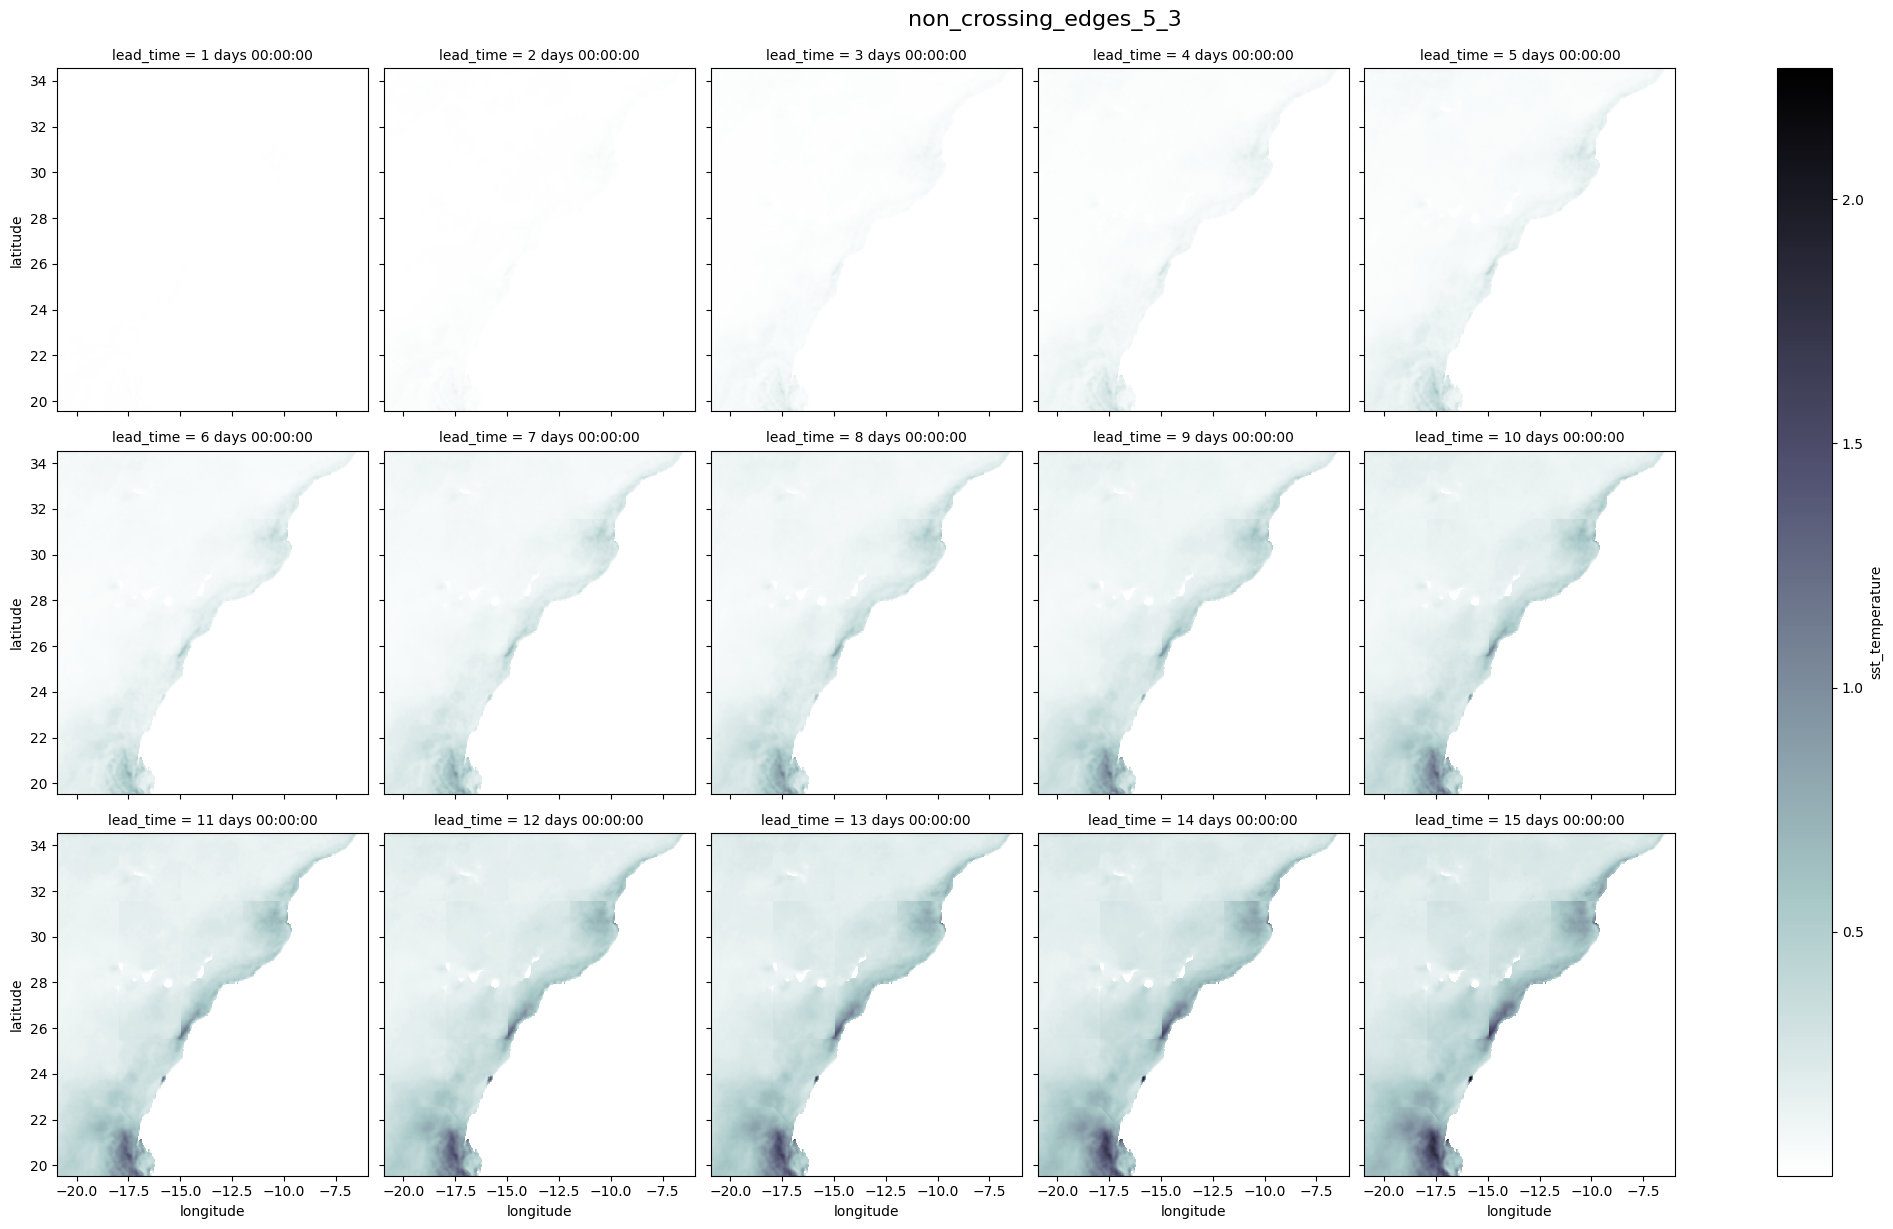

In [13]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].plot(
    x="longitude", 
    y="latitude", 
    col="lead_time", 
    cmap='bone_r',
    col_wrap=5,
    aspect=1, 
    size=4,
    )
plt.suptitle("non_crossing_edges_5_3", fontsize=16, y=1.02)

Text(0.5, 1.02, 'non_crossing_edges_5_3')

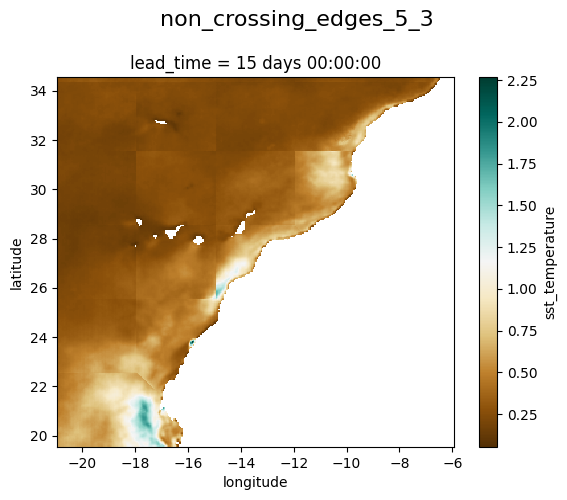

In [14]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].isel(lead_time=-1).plot(cmap='BrBG')
plt.suptitle("non_crossing_edges_5_3", fontsize=16, y=1.02)

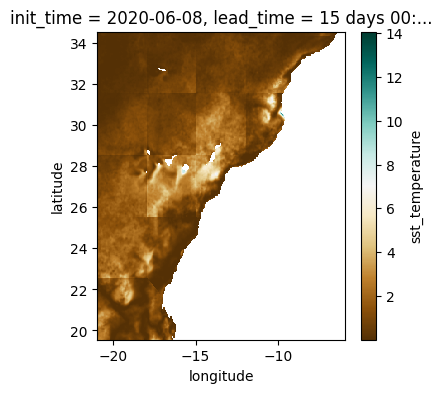

In [15]:
statistics['SquaredError']['sst_temperature'].isel(init_time=100, lead_time=-1).plot(
    x="longitude", 
    y="latitude", 
    cmap='BrBG',
    aspect=1, 
    size=4,
)

In [16]:
variables = ["sst_temperature"]
directory = f"{HOME}/data/atlantic/samples/test"
extra_variables = ["coordinates", "mask"]

extra_files = [
    f"{HOME}/data/atlantic/static/coordinates.npy", 
    f"{HOME}/data/atlantic/static/sea_mask.npy"
    ]

targets = TargetsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
    )
    
targets_dataset = targets.load_chunk()
directory = f"{HOME}/output/bathymetry_14_5/predictions"

pred_loader = PredictionsFromNumpy(
    path=directory,
    variables=variables,
    extra_variables=extra_variables,
    extra_files=extra_files
)

predictions_dataset = pred_loader.load_chunk()

statistics = metrics_base.compute_unique_statistics_for_all_metrics(
  metrics, predictions_dataset, targets_dataset
)

aggregator = aggregation.Aggregator(
  reduce_dims=["init_time"], skipna=True
)

aggregation_state = aggregator.aggregate_statistics(statistics)

x3 = aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].lead_time.data.astype('timedelta64[D]')
y3 = aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].mean(dim=['latitude', 'longitude'], skipna=True).data

Text(0.5, 1.02, 'bathymetry_14_5')

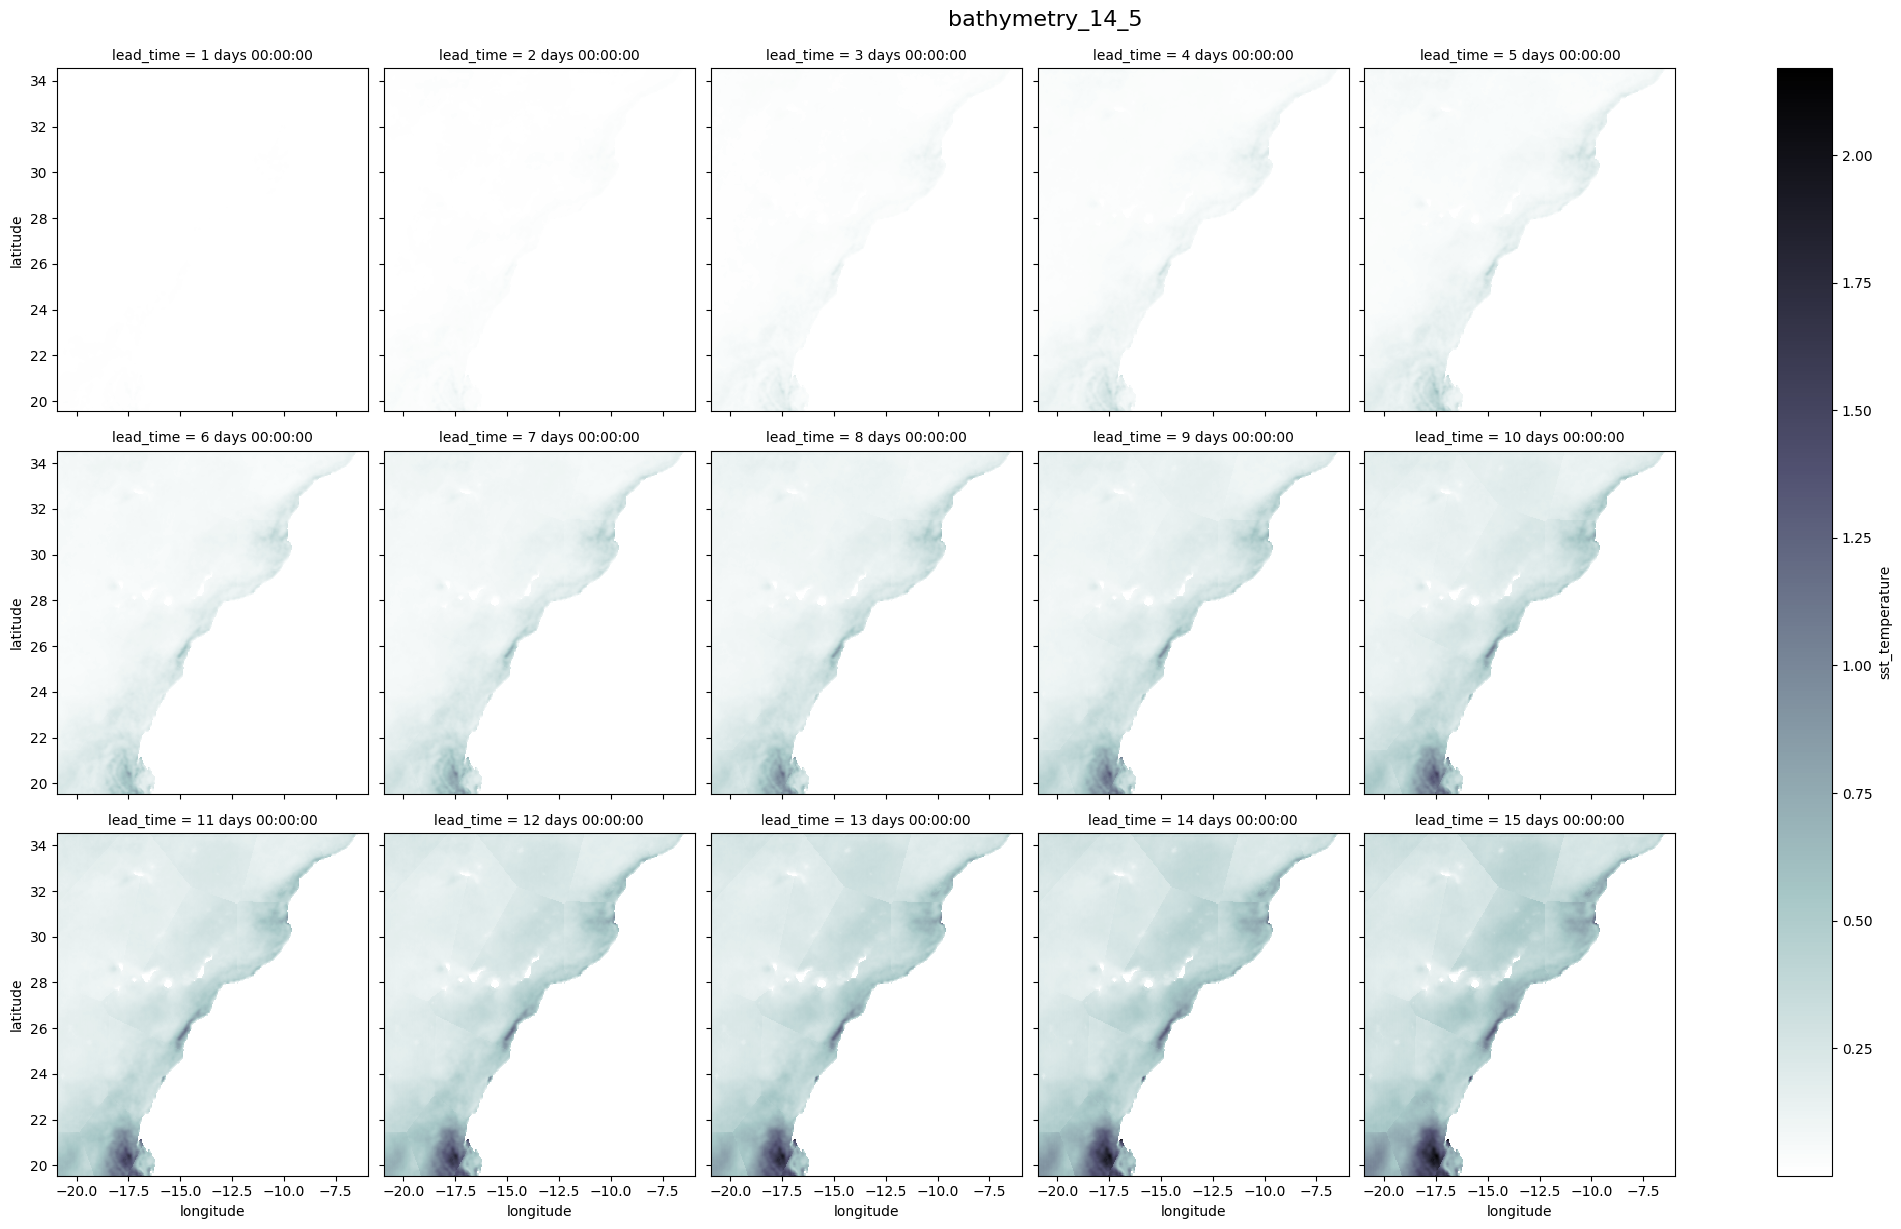

In [17]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].plot(
    x="longitude", 
    y="latitude", 
    col="lead_time", 
    cmap='bone_r',
    col_wrap=5,
    aspect=1, 
    size=4,
    )
plt.suptitle("bathymetry_14_5", fontsize=16, y=1.02)

Text(0.5, 1.02, 'bathymetry_14_5')

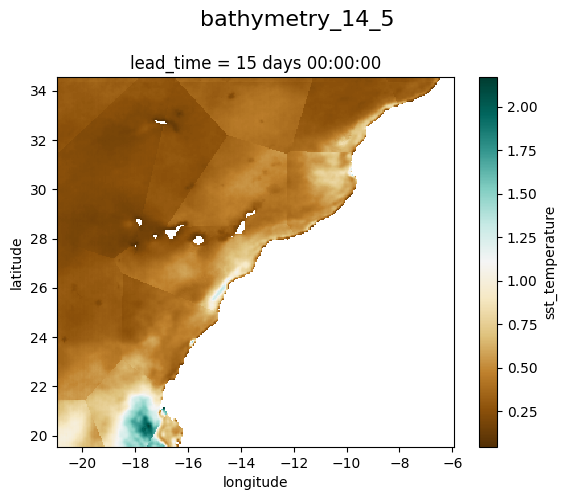

In [18]:
aggregation_state.mean_statistics()['SquaredError']['sst_temperature'].isel(lead_time=-1).plot(cmap='BrBG')
plt.suptitle("bathymetry_14_5", fontsize=16, y=1.02)

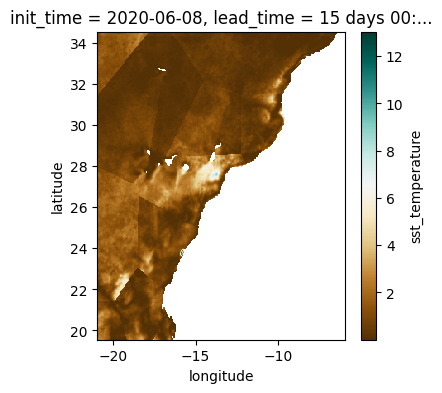

In [19]:
statistics['SquaredError']['sst_temperature'].isel(init_time=100, lead_time=-1).plot(
    x="longitude", 
    y="latitude", 
    cmap='BrBG',
    aspect=1, 
    size=4,
)

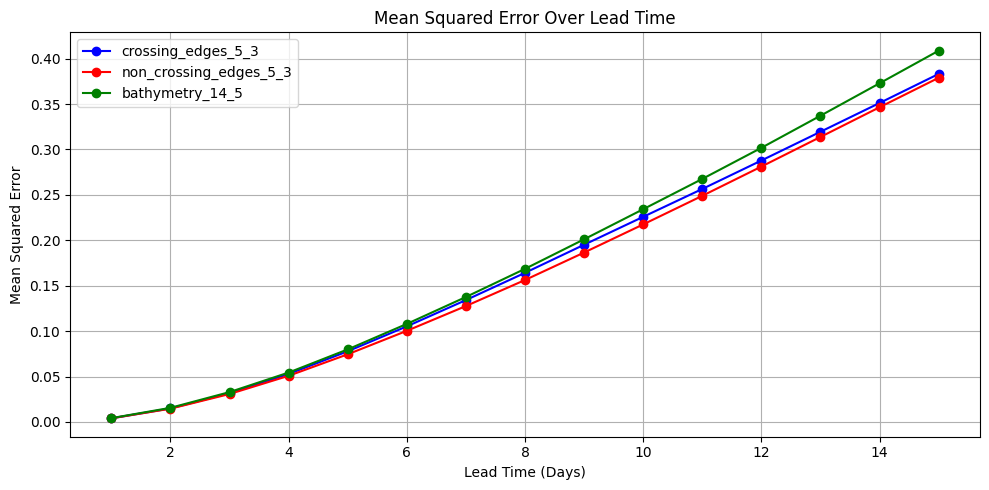

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(x1, y1, marker='o', linestyle='-', color='b', label='crossing_edges_5_3')
plt.plot(x2, y2, marker='o', linestyle='-', color='r', label='non_crossing_edges_5_3')
plt.plot(x3, y3, marker='o', linestyle='-', color='g', label='bathymetry_14_5')
plt.title('Mean Squared Error Over Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Mean Squared Error')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()